In [2]:
import tensorflow as tf
import numpy as np
import sys,os,time
import matplotlib.pyplot as plt

Need to create 10 dimensional vectors sampled from Gaussian distributuion. 
"Optimizers were trained by optimizing random functions from this family and tested on newly sampled functions from the same distributions "

In [3]:
# create dimensional vestors from Normal distributions and choose theirscaling randomly

In [13]:
dims=10
x_vals=tf.random_normal([dims])
# x_vals=tf.ones(dims)

In [5]:
def loss_func(w):
    val=w*x_vals
    return tf.reduce_sum(val*val)

In [6]:
def grad_sgd(grads,expo_avg,lr=0.1):
    return -lr*grads,expo_avg


In [7]:
def grad_rmsprop(grads,expo_avg,lr=0.1,decay_rate=0.99):
    if expo_avg is None:
        expo_avg=np.zeros(dims)
    expo_avg=decay_rate*expo_avg+(1-decay_rate)*tf.pow(grads,2)
    update=-(lr*grads)/tf.sqrt(expo_avg+1e-6)
    return update,expo_avg

In [8]:
num_itr=30

start_point=tf.random_uniform([dims],-1,1)  #starting point for gradient descent

def optimizee(grad_optimizer):
    w=start_point
    loss_vals=[]
    expo_avg=None
    for i in range(num_itr):
        loss=loss_func(w)
        loss_vals.append(loss)
        grad_values,=tf.gradients(loss,w)
        update,expo_avg=grad_optimizer(grad_values,expo_avg)
        w+=update
    return loss_vals

In [9]:
sgd_losses=optimizee(grad_sgd)
rmsprop_losses=optimizee(grad_rmsprop)

In [10]:
if tf.InteractiveSession():
    tf.InteractiveSession().close()
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

/home/rahul/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


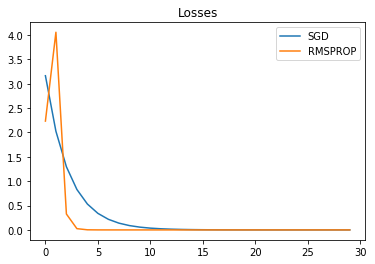

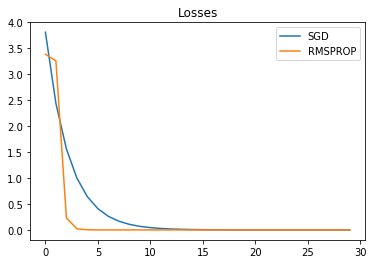

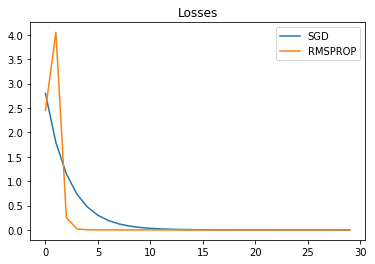

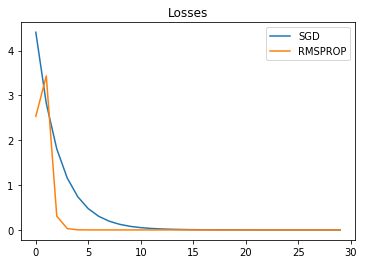

In [14]:

for i in range(4):
    plt.plot(np.arange(num_itr),sess.run(sgd_losses),label='SGD')
    plt.plot(np.arange(num_itr),sess.run(rmsprop_losses),label='RMSPROP')
    plt.legend()
    plt.title('Losses')
    plt.show()

# meta leraner(RNN)

#create an RNN with 2 layers and 20 states(same as in paper). Use this RNN as an optimizer for function
minimizer. Inputs to RNN will be previous RNN states and gradient from the function minimizer. And for optimizing
RNN use ADAM or some other standard optimizer. 

Understand the benefit of using RNN as an optimizer. Is this better in terms of accuracy? what's the computation 
time for both the approaches?

In [1]:
2222222

2222222